In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as pltS
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta



In [2]:
df = pd.read_excel('../data/Supermarket_Sales_cleaned.xlsx')

# Time Series Analysis
- Trend
- Seasonality
- Cyclicity
- Irregularity

In [3]:
df.dtypes

ID                                object
Thời gian                 datetime64[ns]
Thành phố                         object
Chi nhánh                         object
Nhóm khách hàng                   object
Giới tính                         object
Phân loại                         object
Tên SP                            object
SKU                                int64
Giá vốn đơn vị                   float64
Giá bán                          float64
Số lượng                           int64
COGS                             float64
Discount                         float64
Phương thức thanh toán            object
Doanh thu ròng                   float64
Lợi nhuận                        float64
dtype: object

In [4]:
df["Năm"] = df["Thời gian"].dt.year
df["Tháng"] = df["Thời gian"].dt.to_period("M").astype(str)
df["Quý"] = df["Thời gian"].dt.to_period("Q").astype(str)

In [5]:
df

,ID,Thời gian,Thành phố,Chi nhánh,Nhóm khách hàng,Giới tính,Phân loại,Tên SP,SKU,Giá vốn đơn vị,Giá bán,Số lượng,COGS,Discount,Phương thức thanh toán,Doanh thu ròng,Lợi nhuận,Năm,Tháng,Quý
0,CUS-0007,2024-01-01 20:34:00,Đà Nẵng,ABC Hải Châu,Member,Male,Electronics,Laptop,1000,54130.33,70369.43,1,54130.33,0.00,E-Wallet,70369.43,16239.10,2024,2024-01,2024Q1
1,CUS-0042,2024-01-18 20:04:00,TP.HCM,ABC Thủ Đức,Normal,Female,Electronics,Laptop,1000,54130.33,70369.43,3,162390.99,8592.11,Cash,202516.18,40125.19,2024,2024-01,2024Q1
2,CUS-0120,2024-01-20 20:05:00,Hà Nội,ABC Cầu Giấy,Normal,Male,Electronics,Laptop,1000,54130.33,70369.43,2,108260.66,3082.18,E-Wallet,137656.68,29396.02,2024,2024-01,2024Q1
3,CUS-0080,2024-03-09 17:04:00,Đà Nẵng,ABC Hải Châu,Member,Male,Electronics,Laptop,1000,54130.33,70369.43,3,162390.99,18176.42,E-Wallet,192931.87,30540.88,2024,2024-03,2024Q1
4,CUS-0005,2024-03-30 18:03:00,TP.HCM,ABC Quận 7,Member,Female,Electronics,Laptop,1000,54130.33,70369.43,2,108260.66,3419.95,Credit Card,137318.91,29058.25,2024,2024-03,2024Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,CUS-1703,2024-11-16 20:00:00,TP.HCM,ABC Quận 1,Member,Female,Personal Care,Sanitary Pads,1058,106.11,137.95,7,742.77,76.38,E-Wallet,889.27,146.50,2024,2024-11,2024Q4
6563,CUS-0786,2024-01-06 20:40:00,TP.HCM,ABC Quận 7,Member,Male,Personal Care,Sanitary Pads,1058,106.11,137.95,9,954.99,95.48,Credit Card,1146.07,191.08,2024,2024-01,2024Q1
6564,CUS-0005,2025-06-02 18:30:00,TP.HCM,ABC Quận 7,Member,Female,Personal Care,Sanitary Pads,1058,106.11,137.95,5,530.55,16.55,Credit Card,673.20,142.65,2025,2025-06,2025Q2
6565,CUS-1848,2024-12-29 19:37:00,Đà Nẵng,ABC Hải Châu,Normal,Male,Personal Care,Sanitary Pads,1058,106.11,137.95,5,530.55,47.66,Credit Card,642.09,111.54,2024,2024-12,2024Q4


## 1. Theo dõi xu hướng doanh thu & lợi nhuận theo thời gian.

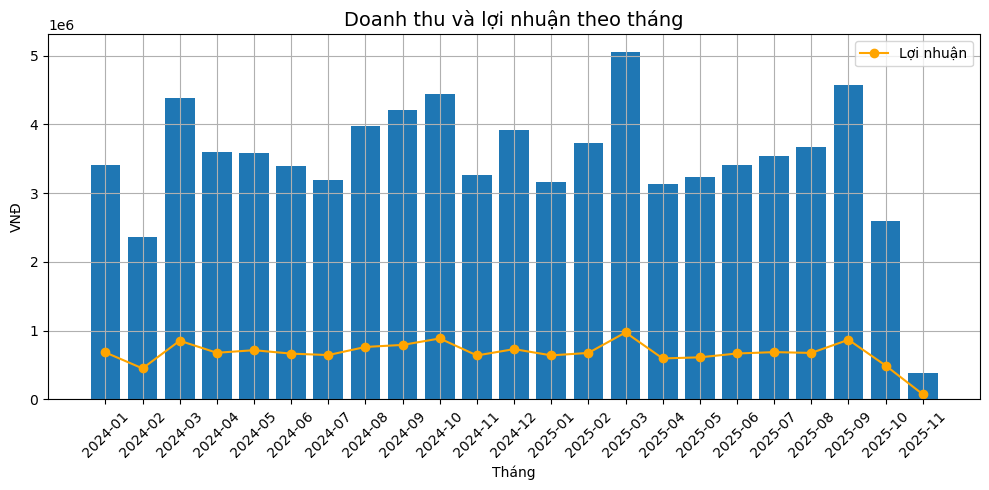

In [6]:
monthly_revenue = df.groupby('Tháng')[['Doanh thu ròng', 'Lợi nhuận']].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(monthly_revenue['Tháng'], monthly_revenue['Doanh thu ròng'])
plt.plot(monthly_revenue['Tháng'], monthly_revenue['Lợi nhuận'], marker='o', color='orange', label='Lợi nhuận')
plt.title("Doanh thu và lợi nhuận theo tháng", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("VNĐ")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Doanh thu/lợi nhuận cao nhất trong năm rơi vào tháng 3 (cuối quý 1) → chạy chiến dịch
- Tuy doanh thu dao động mạnh (cao điểm mua sắm thường ở tháng 3, tháng 9) nhưng lợi nhuận khá ổn định


In [7]:
monthly_revenue1 = df.groupby(["Năm", "Tháng"])["Doanh thu ròng"].sum().reset_index()

# Tạo cột năm trước để so sánh YOY
monthly_yoy = monthly_revenue1.pivot(index="Tháng", columns="Năm", values="Doanh thu ròng")

# Tạo cột chỉ chứa số tháng (MM)
monthly_yoy["month_only"] = monthly_yoy.index.str[-2:]

# Gộp dữ liệu của 2 năm theo số tháng
compare_yoy = monthly_yoy.groupby("month_only")[[2024, 2025]].sum()

# Tính % tăng/giảm YOY
compare_yoy["% thay đổi YOY"] = (compare_yoy[2025] - compare_yoy[2024]) / compare_yoy[2024] * 100

compare_yoy = compare_yoy[(compare_yoy.index!= '11') & (compare_yoy.index != '12')] # dữ liệu chỉ ghi nhận đến ngày 1/11
compare_yoy

Năm,2024,2025,% thay đổi YOY
month_only,,,
01,3415812.65,3162634.31,-7.411950
02,2356137.58,3724192.77,58.063468
03,4383239.93,5058888.58,15.414366
04,3593311.38,3125880.32,-13.008365
05,3579158.93,3231720.63,-9.707261
06,3399473.46,3416592.04,0.503566
07,3191460.28,3535872.86,10.791693
08,3980167.73,3678771.48,-7.572451
09,4203936.69,4569851.93,8.704109


In [8]:
(compare_yoy[2025].sum()-compare_yoy[2024].sum())/compare_yoy[2024].sum()*100

np.float64(-1.2237835634369463)

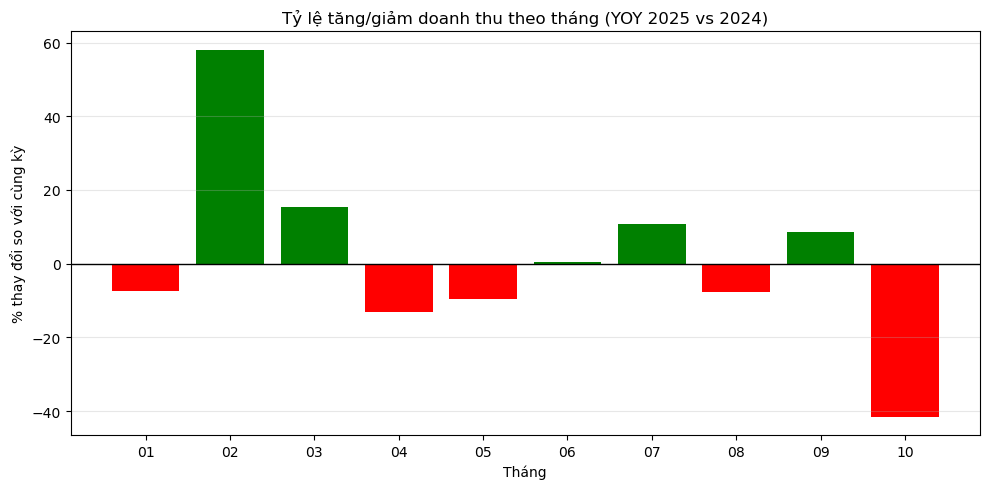

In [9]:
plt.figure(figsize=(10,5))
plt.bar(compare_yoy.index,
        compare_yoy["% thay đổi YOY"],
        color=["green" if x > 0 else "red" for x in compare_yoy["% thay đổi YOY"]])
plt.axhline(0, color="black", linewidth=1)
plt.title("Tỷ lệ tăng/giảm doanh thu theo tháng (YOY 2025 vs 2024)")
plt.xlabel("Tháng")
plt.ylabel("% thay đổi so với cùng kỳ")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


- Số tháng tăng trưởng: 5 tháng
- Số tháng giảm: 5 tháng (do mùa vụ tiêu dùng, sức mua khu vực chênh lệch)
- Tháng tăng mạnh nhất: tháng 2 → Có thể nhờ Tết Nguyên Đán hoặc chiến dịch đầu năm.
- Tháng 4-5: sau Tết nhu cầu giảm → cần có mid-year sale
- Tháng 7-9: tăng trở lại → chương trình Back-to-school, quà tặng mở năm học.

In [10]:
quarter_revenue = df.groupby(["Năm", "Quý"])["Doanh thu ròng"].sum().reset_index()

# Lấy mã quý (Q1, Q2, Q3, Q4)
quarter_revenue["Mã_quý"] = quarter_revenue["Quý"].str[-2:]
quarter_yoy = quarter_revenue.pivot(index="Mã_quý", columns="Năm", values="Doanh thu ròng")

# Tính % thay đổi YOY
quarter_yoy["% thay đổi YOY"] = (quarter_yoy[2025] - quarter_yoy[2024]) / quarter_yoy[2024] * 100
quarter_yoy = quarter_yoy[quarter_yoy.index != "Q4"] # dữ liệu chỉ ghi nhận đến ngày 1/11
quarter_yoy

Năm,2024,2025,% thay đổi YOY
Mã_quý,,,
Q1,10155190.16,11945715.66,17.631629
Q2,10571943.77,9774192.99,-7.545923
Q3,11375564.70,11784496.27,3.594824


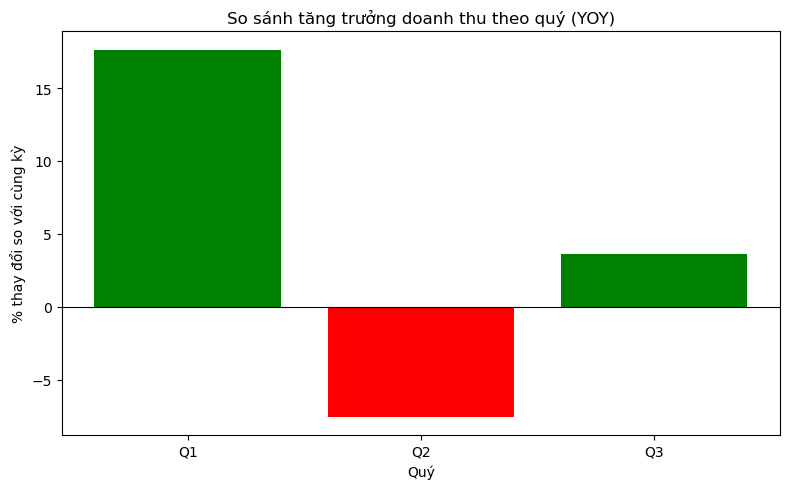

In [11]:
plt.figure(figsize=(8,5))
plt.bar(quarter_yoy.index, quarter_yoy["% thay đổi YOY"], color=["green" if x>0 else "red" for x in quarter_yoy["% thay đổi YOY"]])
plt.axhline(0, color="black", linewidth=0.8)
plt.title("So sánh tăng trưởng doanh thu theo quý (YOY)")
plt.xlabel("Quý")
plt.ylabel("% thay đổi so với cùng kỳ")
plt.tight_layout()
plt.show()


- Q1: Tăng tốt đầu năm, có thể do mua sắm Tết 
- Q2: Hành vi tiêu dùng giảm sau Tết (“hiệu ứng sau mùa lễ”), thiếu khuyến mãi giữa năm
- Q3: Hồi phục, tăng trở lại (Back-to-School)

→ Tăng trưởng YOY dương ở Q1 & Q3, cho thấy hiệu ứng mùa vụ tiêu dùng.

→ **Doanh thu 9 tháng đầu năm 2025 tăng ~7.5% so với cùng kỳ 2024.**

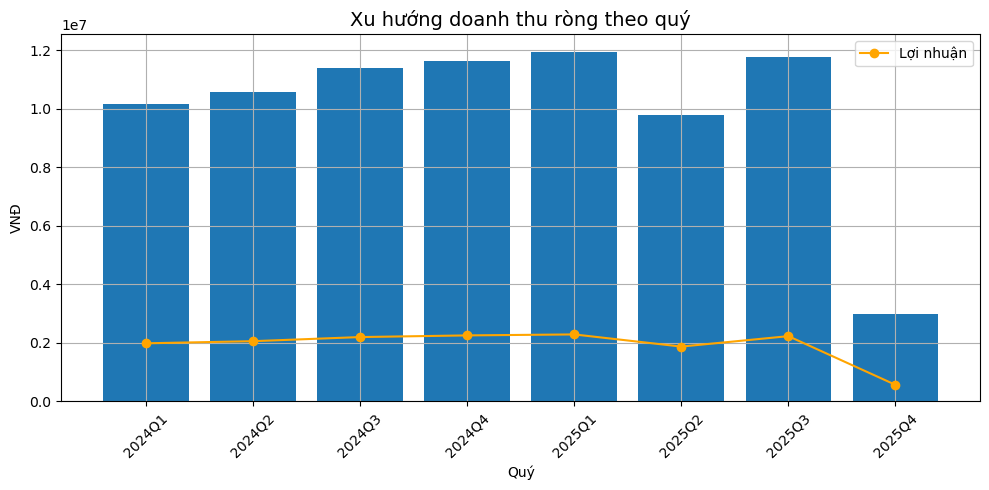

In [12]:
# Tính tổng doanh thu ròng theo quý
quarter_revenue = df.groupby('Quý')[['Doanh thu ròng', 'Lợi nhuận']].sum().reset_index()

# Vẽ biểu đồ doanh thu ròng theo quý
plt.figure(figsize=(10, 5))
plt.bar(quarter_revenue['Quý'], quarter_revenue['Doanh thu ròng'],)
plt.plot(quarter_revenue['Quý'], quarter_revenue['Lợi nhuận'], marker='o', color='orange', label='Lợi nhuận')
plt.title("Xu hướng doanh thu ròng theo quý", fontsize=14)
plt.xlabel("Quý")
plt.ylabel("VNĐ")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

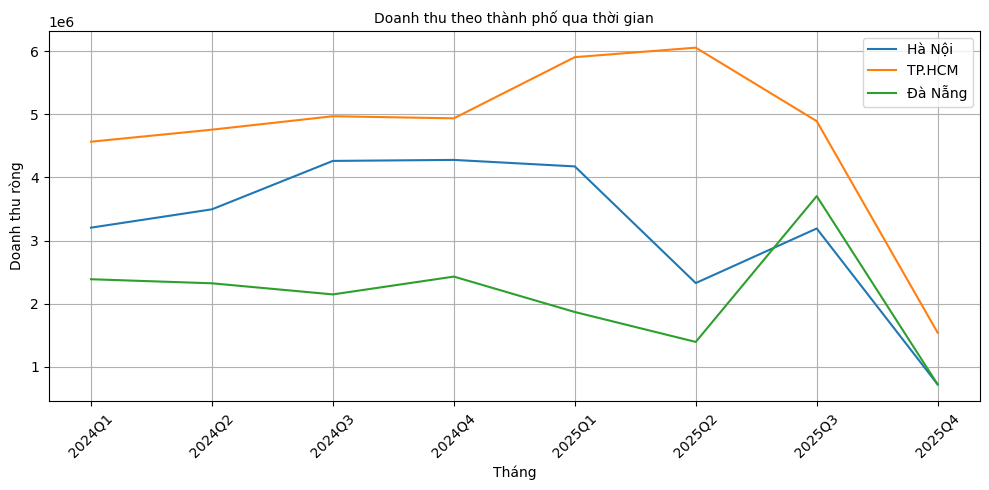

In [13]:
# Doanh thu theo thành phố qua thời gian
quarter_revenue_city = df.groupby(['Quý', 'Thành phố'])['Doanh thu ròng'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=quarter_revenue_city, x='Quý', y='Doanh thu ròng', hue='Thành phố')
plt.title("Doanh thu theo thành phố qua thời gian", fontsize=10)
plt.xlabel("Tháng")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Chi nhánh TP.HCM chiếm tỷ trọng doanh thu cao nhất toàn hệ thống.
- Chi nhánh Hà Nội, Đà Nẵng có xu hướng tăng giai đoạn nửa năm trước khi tụt hẳn → cần phân tích nguyên do
- Đà Nẵng có cú bứt phá doanh thu trong Q3/2025 → thử nghiệm chiến dịch ngắn hạn hoặc đẩy mạnh hoạt động mùa du lịch.

In [14]:
total_revenue2024 = df[df['Thời gian'].dt.year==2024].groupby('Thành phố')['Doanh thu ròng'].sum()
total_revenue2024

Thành phố
Hà Nội     15235233.92
TP.HCM     19224660.80
Đà Nẵng     9283277.58
Name: Doanh thu ròng, dtype: float64

In [15]:
total_revenue2025 = df[df['Thời gian'].dt.year==2025].groupby('Thành phố')['Doanh thu ròng'].sum()
total_revenue2025

Thành phố
Hà Nội     10410729.23
TP.HCM     18389495.55
Đà Nẵng     7684495.91
Name: Doanh thu ròng, dtype: float64

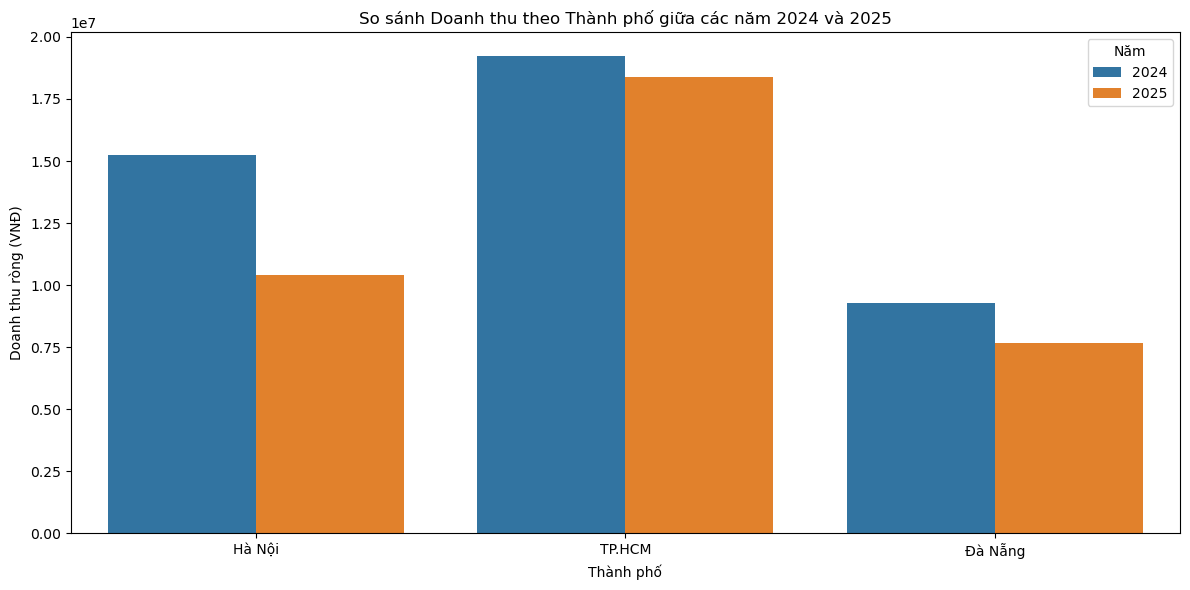

In [16]:
# Doanh thu theo thành phố qua thời gian
compare_city = pd.DataFrame({
    'Thành phố': total_revenue2024.index,
    '2024': total_revenue2024.values,
    '2025': total_revenue2025.values
}).melt(id_vars='Thành phố', var_name='Năm', value_name='Doanh thu ròng')

# Vẽ biểu đồ cột đôi
plt.figure(figsize=(12,6))
sns.barplot(
    data=compare_city,
    x='Thành phố',
    y='Doanh thu ròng',
    hue='Năm',
)

plt.title('So sánh Doanh thu theo Thành phố giữa các năm 2024 và 2025')
plt.ylabel('Doanh thu ròng (VNĐ)')
plt.xlabel('Thành phố')
plt.legend(title='Năm')
plt.tight_layout()
plt.show()

- TP. HCM luôn dẫn đầu về doanh thu
- Hà Nội xu hướng giảm vào năm 2025 → có thể do các chiến dịch tập trung vào miền Nam hơn

## 2. Phân tích mùa vụ (seasonality) – tìm ra các giai đoạn cao điểm hoặc thấp điểm mua sắm.

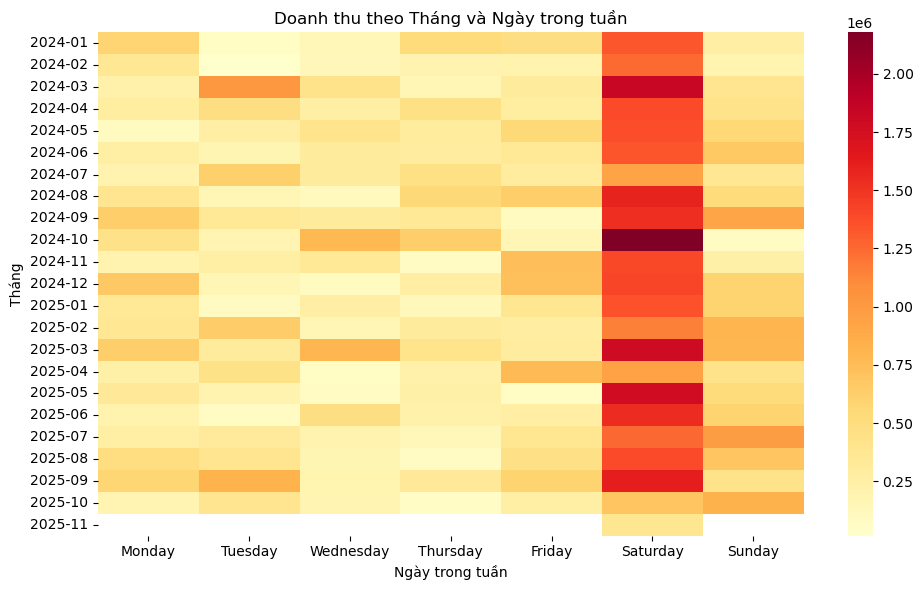

In [17]:
df["Ngày_trong_tuần"] = df["Thời gian"].dt.day_name()
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

heatmap_data = df.groupby(["Tháng", "Ngày_trong_tuần"])["Doanh thu ròng"].sum().unstack().reindex(columns=order_days)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False)
plt.title("Doanh thu theo Tháng và Ngày trong tuần")
plt.xlabel("Ngày trong tuần")
plt.ylabel("Tháng")
plt.tight_layout()
plt.show()


Giai đoạn cao điểm

- Tháng 3, 9, 10 (2024), cùng tháng 3 và 9 (2025) có màu đậm  → tức doanh thu cao.

- Đây có thể là mùa khuyến mãi lớn (tháng 3 – sau Tết, tháng 9 – trước lễ cuối năm).

- Tháng 12/2024 – 1/2025: vẫn giữ màu đậm → có thể liên quan tới mùa mua sắm Tết Dương & Âm lịch.

Giai đoạn thấp điểm

- Tháng 5–7 (cả hai năm) và tháng 4/2025: màu nhạt hơn rõ → doanh thu thấp

- Giai đoạn “giữa năm” ít lễ.

- Người tiêu dùng tập trung chi tiêu cho việc khác thay vì mua sắm.

Ngày cao điểm

- Cuối tuần thứ 6, 7, CN có màu khá đậm → cao điểm bán hàng hàng tuần.

- Đặc biệt là thứ 7: doanh thu tăng mạnh.

Ngày thấp điểm

- Các ngày trong tuần → chạy khuyến mãi kích cầu giữa tuần

## 3. So sánh hiệu suất giữa các chi nhánh 

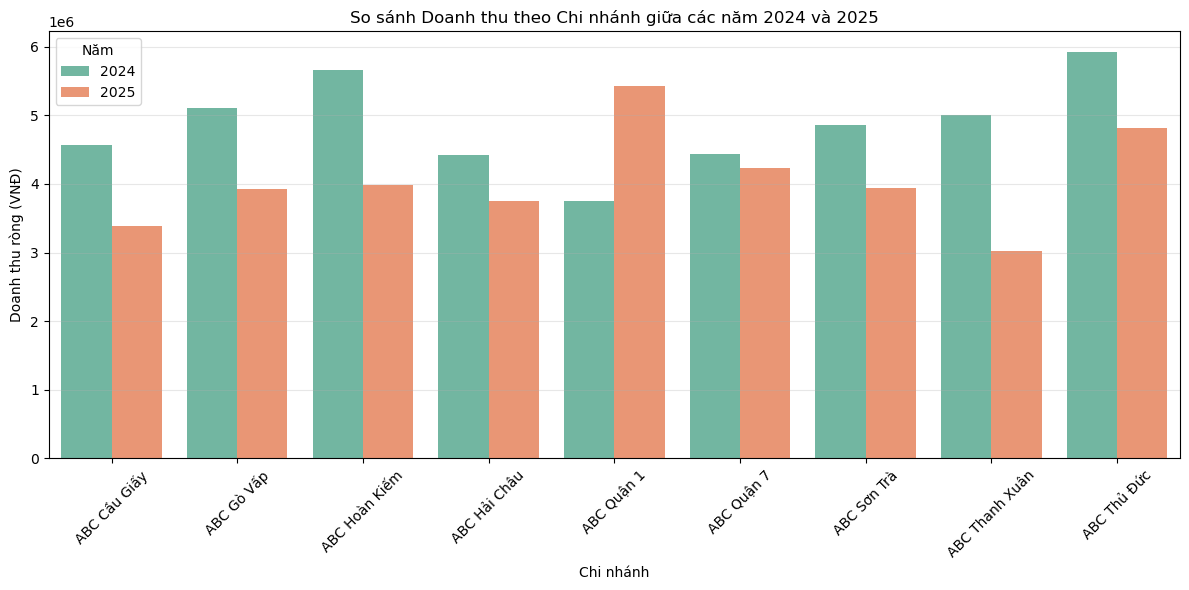

In [18]:
# YOY
branch_quarter = df.groupby(["Chi nhánh", "Năm", "Thành phố"])["Doanh thu ròng"].sum().reset_index()

# --- Vẽ biểu đồ cột nhóm ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=branch_quarter,
    x="Chi nhánh",
    y="Doanh thu ròng",
    hue="Năm",
    palette="Set2", errorbar=None
)
plt.title("So sánh Doanh thu theo Chi nhánh giữa các năm 2024 và 2025")
plt.xlabel("Chi nhánh")
plt.ylabel("Doanh thu ròng (VNĐ)")
plt.xticks(rotation=45)
plt.legend(title="Năm")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


- Đa số chi nhánh bị giảm doanh thu trong năm 2025 so với 2024 (do 2025 chỉ ghi nhận đến ngày 29/10)
- Chi nhánh ABC Quận 1 là chi nhánh duy nhất có mức tăng trưởng mạnh → cần được điều tra sâu — có thể nhờ vị trí trung tâm, chiến dịch marketing riêng, hoặc tập khách hàng doanh nghiệp lớn.
- Sự chênh lệch giữa các khu vực → khả năng có vấn đề về phân bổ ngân sách marketing hoặc hàng tồn kho.

## 4. Đánh giá hành vi khách hàng (nhóm Member vs Normal, phương thức thanh toán theo thời gian).

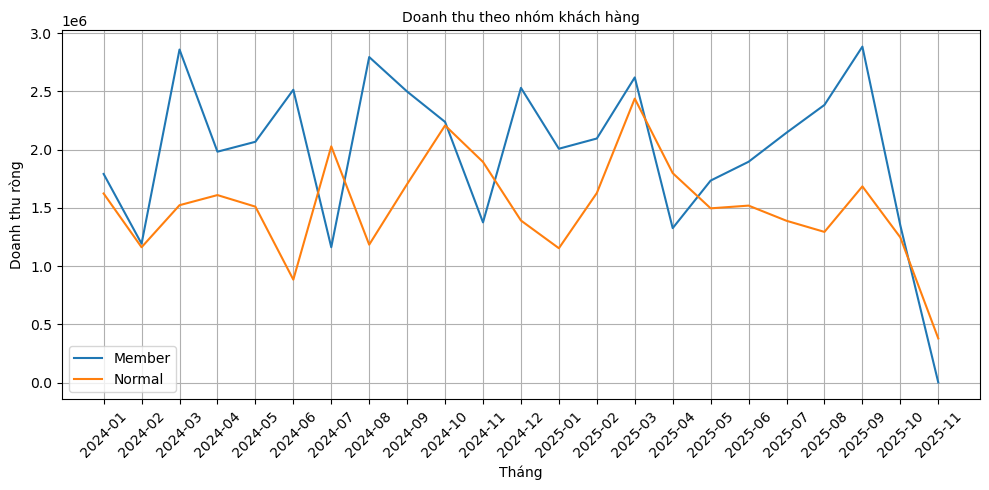

In [19]:
# Biểu đồ doanh thu theo nhóm khách hàng
monthlycus_revenue = df.groupby(['Tháng', 'Nhóm khách hàng'])['Doanh thu ròng'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthlycus_revenue, x='Tháng', y='Doanh thu ròng', hue='Nhóm khách hàng')
plt.title("Doanh thu theo nhóm khách hàng", fontsize=10)
plt.xlabel("Tháng")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Member tổng quan đem lại doanh thu cao hơn hẳn so với Normal
- Cần có chương trình chăm sóc Member vì nhóm đang có xu hướng sụt giảm rất nhanh trong 2 tháng gần đây

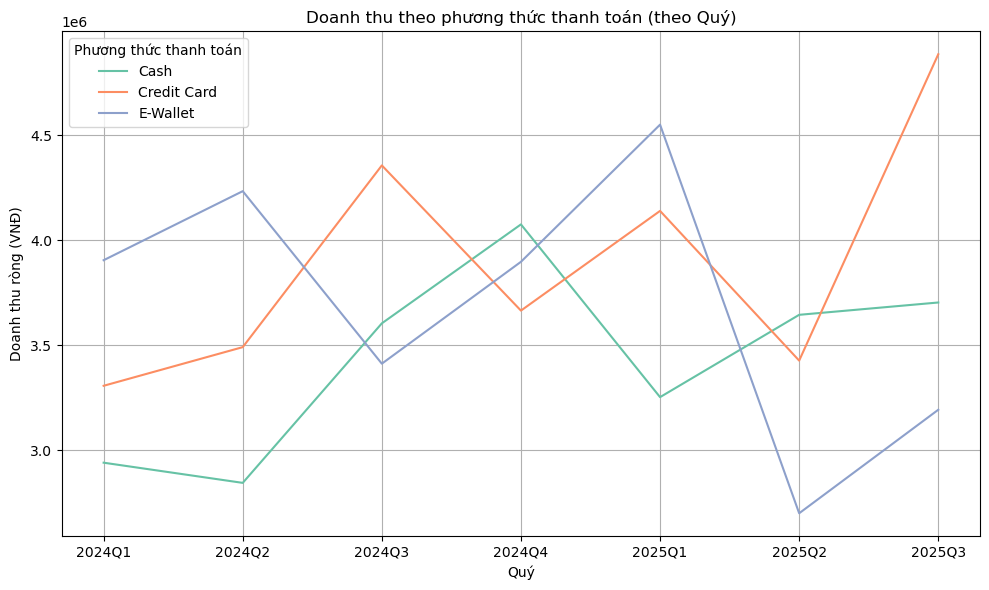

In [20]:
# Tổng doanh thu theo quý & phương thức thanh toán
payment_quarter = df.groupby(['Quý', 'Phương thức thanh toán'])['Doanh thu ròng'].sum().reset_index()
payment_quarter = payment_quarter[payment_quarter['Quý'] != '2025Q4']  # Loại bỏ quý không đầy đủ dữ liệu

# Vẽ biểu đồ cột nhóm
plt.figure(figsize=(10,6))
sns.lineplot(data=payment_quarter, x='Quý', y='Doanh thu ròng', hue='Phương thức thanh toán', palette='Set2')
plt.title("Doanh thu theo phương thức thanh toán (theo Quý)")
plt.ylabel("Doanh thu ròng (VNĐ)")
plt.xlabel("Quý")
plt.legend(title="Phương thức thanh toán")
plt.grid(True)
plt.tight_layout()
plt.show()

- Credit Card tăng mạnh và ổn định nhất → xu hướng chính của khách hàng → Hợp tác ngân hàng, mở rộng trả góp 0%, hoàn tiền, ưu đãi thẻ → Giữ chân khách trung thành
- E-Wallet dao động mạnh → có giai đoạn tăng nhanh, nhưng sau đó giảm → Triển khai chiến dịch “giảm thêm 5% khi thanh toán qua ví” → Thu hút nhóm trẻ
- Cash ít biến động, nhưng đang chậm hơn hẳn so với hai phương thức số hóa.